   #                                                  Titanic Exercise II
   #### Practice matplotlib & seaborn

![titanic](https://userscontent2.emaze.com/images/a5f68f37-6349-4065-a1fc-921cbe7401b2/958230111417e36d6b3c67ffd7bc3494.jpeg)

First of all, import the needed libraries. 

In [1]:

# visualisation libraries
%matplotlib inline
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set seaborn style to white
sns.set_style("white")

1. Read the `.csv` file you generated in **1_Titanic-Pandas** `titanic_cleaned.csv` and call the variable `titanic`.

Help: If you didn't get to the point in which you should have saved the file, ask the instructor. 

In [3]:
filename = "titanic_cleaned.csv"

In [4]:
#your code
titanic = pd.read_csv(filename)

2. Using matplotlib find the appropriate visualization to show the distribution of the column `age`

Text(0, 0.5, 'Number of Passengers')

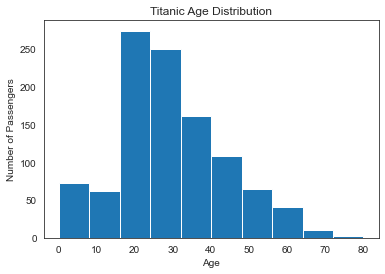

In [6]:
#your code here
plt.hist(titanic.age)
plt.title('Titanic Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

3. Now use seaborn to show the distribution of the column `age`.

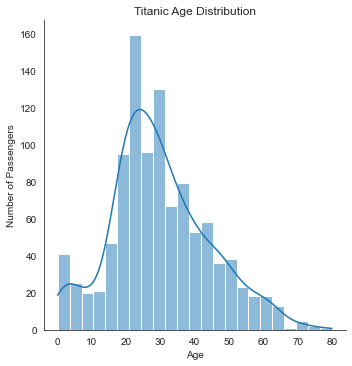

In [8]:
#your code here
sns.displot(data=titanic.age, kde=True).set(xlabel='Age', ylabel='Number of Passengers', title='Titanic Age Distribution')

4. Use subplots to plot the distribution of the Age variable with bins equal to 10, 20 and 50.

Use `sns.histplot()` for that aim. 

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Passengers'),
 Text(0.5, 1.0, 'bins=50')]

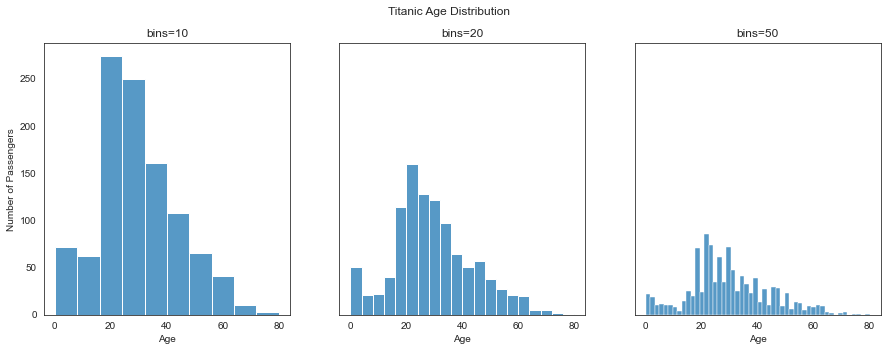

In [16]:
#your code here
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Titanic Age Distribution')
sns.histplot(ax=axes[0], data=titanic.age, bins=10).set(xlabel='Age', ylabel='Number of Passengers', title='bins=10')
sns.histplot(ax=axes[1], data=titanic.age, bins=20).set(xlabel='Age', ylabel='Number of Passengers', title='bins=20')
sns.histplot(ax=axes[2], data=titanic.age, bins=50).set(xlabel='Age', ylabel='Number of Passengers', title='bins=50')

5. Whether the bin size affects your plot? Why?

In [ ]:
#Bin size increases distribution accuracy but also increases the plot complexity and readability.

6. Using matplotlib find the appropriate plot to visualize the column `'gender'` 

Text(0, 0.5, 'Number of Passengers')

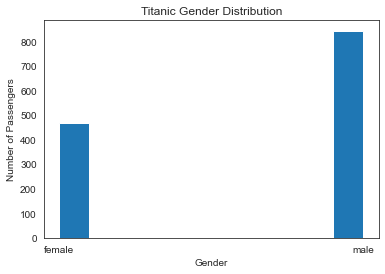

In [37]:
# your code here
plt.hist(titanic.gender)
plt.title('Titanic Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

7. What if you also plot the column `'gender'` using the function [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) from the library [`seaborn`](https://seaborn.pydata.org/)?



<AxesSubplot:xlabel='gender', ylabel='count'>

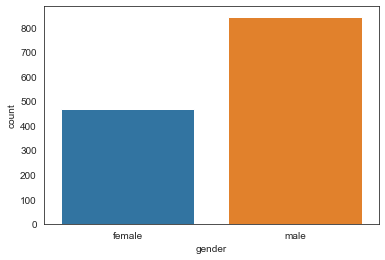

In [41]:
#your code
sns.countplot(x=titanic.gender)

6. Using the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) from the library `seaborn`, find out if the hypothesis _"Women are more likely to survive shipwrecks"_ is true or not.

You should get something like this:

![catplot](img/catplot.png)

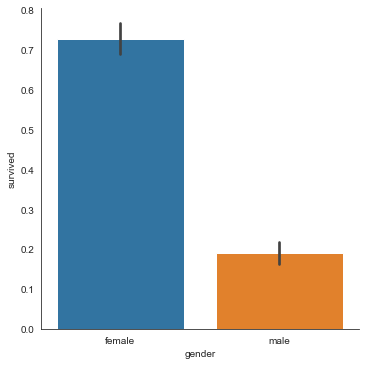

In [51]:
#your code
sns.catplot(data=titanic, x='gender', y='survived', kind='bar')

7. Use the appropriate plot to visualize the column `pclass`.

[[<matplotlib.axis.XTick at 0x19dec4f5ac8>,

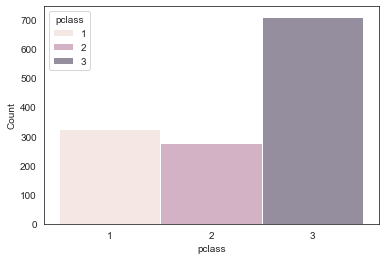

In [74]:
#your code
sns.histplot(data=titanic, x='pclass', discrete=True, hue='pclass').set(xticks=[1,2,3])

8. We would like to have in one single plot the summary statistics of the feature `age`. Choose the appropriate plot to show below.

<AxesSubplot:>

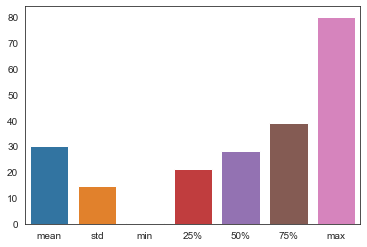

In [89]:
#your code
age_stats = pd.DataFrame(titanic.age.describe()).T.loc[:,'mean':]
sns.barplot(data=age_stats)

9. What does the previous plot tell you about the feature Age? Comment.

In [ ]:
# your comment here

10. Now in addition to the summary statistics, we also want to visualize the distribution of `age`. Choose the appropriate plot to show below.

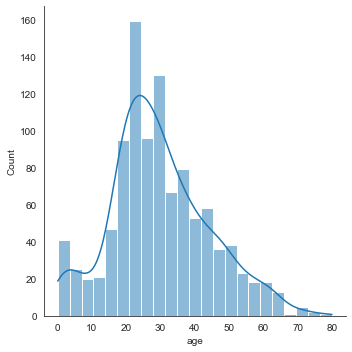

In [90]:
#your code
sns.displot(data=titanic.age, kde=True)

11. Use the appropriate plot to display the distributions of `age` in relation to `gender`.

Hint: use Facetgrid to display the distribution of age for each categorical value of gender. 



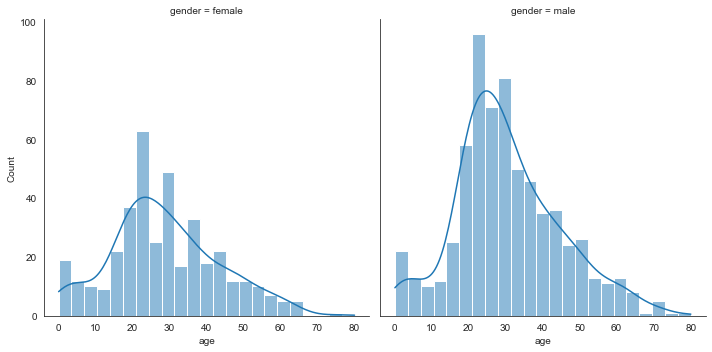

In [92]:
#your code
sns.displot(x=titanic.age, col=titanic.gender, kde=True)

12. Using [`kdeplot`]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") from `seaborn` represent those who not survived distributed by age.

Hint: First you should "filter" the `titanic` dataset where the column "survived" is 0, indexing the column `"age"` only.

Arguments you should pass to the function: 

    - color = "red"
    - label = "Not Survived"
    - shade = True
    
You should get something like this: 

![kdeplot](img/kdeplot.png)

<AxesSubplot:ylabel='Density'>

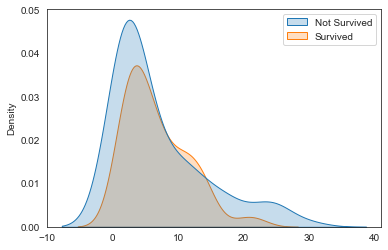

In [12]:
#your code 
deaths = pd.DataFrame(titanic[titanic.survived == 0].groupby('age').count()['survived'])
deaths.rename(columns={'survived':'Not Survived'}, inplace=True)
lived = pd.DataFrame(titanic[titanic.survived == 1].groupby('age').count()['survived'])
lived.rename(columns={'survived':'Survived'}, inplace=True)
live_death = deaths.join(lived)
live_death.fillna(0)
sns.kdeplot(data=live_death, shade=True)
# He intendado cambiar el color pero no lo he conseguido.

13. Using Seaborn plot the correlation matrix of various features.

Hint: search how to use `heatmap`



<AxesSubplot:>

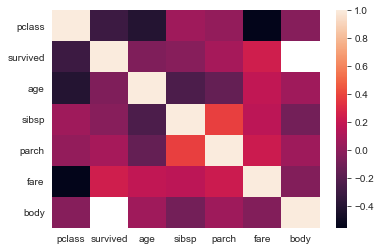

In [19]:
#your code here
sns.heatmap(titanic.corr())

14. According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
# The most correlated are 'body' and 'survived'.